<h1 align="center">NET 4103/7431 Homework</h1> 
<h1 align="center">Network science and Graph Learning</h1> 
</br>
<h3 align="center">ERDENETUYA Anujin</h3> 
</br>
</br>


## Question 2


In [1]:
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from packaging import version
import sys 

print("Python version:", sys.version)
print("networkx version:", nx.__version__)

# assert networkx version is greater or equal to 2.6
assert version.parse(nx.__version__) >= version.parse("2.6")

# assert python version is greater that 3.7
assert sys.version_info[0] == 3
assert sys.version_info[1] >= 7 

# If working in colab mount the drive filesystem 
if 'google.colab' in str(get_ipython()):
    print('Working in colab')
    
    from google.colab import drive
    drive.mount('/content/drive')
else:
    print("working locally")

Python version: 3.8.10 (default, Mar 13 2023, 10:26:41) 
[GCC 9.4.0]
networkx version: 3.0
working locally


In [3]:
g_caltech = nx.read_gml('fb100/data/Caltech36.gml')
g_mit = nx.read_gml("fb100/data/MIT8.gml")
g_hopkins = nx.read_gml("fb100/data/Johns Hopkins55.gml")

Text(0.5, 1.0, 'hopkins PDF')

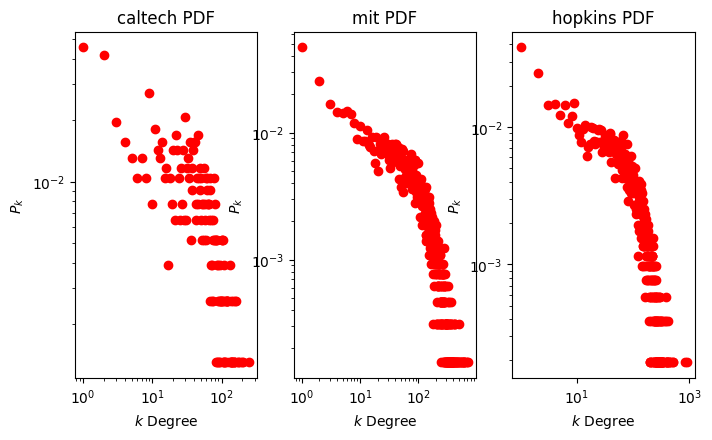

In [4]:
#sns.histplot(caltech_degrees, stat="density", kde=True)
#plt.title("Caltech Degree distribution")

caltech_degree = [v for k,v in dict(g_caltech.degree()).items()]
caltech_distribution = [(elem, caltech_degree.count(elem)) for elem in sorted(set(caltech_degree))]
caltech_k,caltech_pk = zip(*caltech_distribution)
caltech_PDF = np.array(caltech_pk)/sum(caltech_pk)

mit_degree = [v for k,v in dict(g_mit.degree()).items()]
mit_distribution = [(elem, mit_degree.count(elem)) for elem in sorted(set(mit_degree))]
mit_k,mit_pk = zip(*mit_distribution)
mit_PDF = np.array(mit_pk)/sum(mit_pk)

hopkins_degree = [v for k,v in dict(g_hopkins.degree()).items()]
hopkins_distribution = [(elem, hopkins_degree.count(elem)) for elem in sorted(set(hopkins_degree))]
hopkins_k,hopkins_pk = zip(*hopkins_distribution)
hopkins_PDF = np.array(hopkins_pk)/sum(hopkins_pk)
                            
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16/2,9/2))
ax1.loglog(caltech_k, caltech_PDF, 'ro')
ax1.set_xlabel("$k$ Degree")
ax1.set_ylabel("$P_k$")
ax1.set_title("caltech PDF")

ax2.loglog(mit_k, mit_PDF, 'ro')
ax2.set_xlabel("$k$ Degree")
ax2.set_ylabel("$P_k$")
ax2.set_title("mit PDF")

ax3.loglog(hopkins_k, hopkins_PDF, 'ro')
ax3.set_xlabel("$k$ Degree")
ax3.set_ylabel("$P_k$")
ax3.set_title("hopkins PDF")

In [5]:

gcc_caltech = nx.transitivity(g_caltech)
gcc_mit = nx.transitivity(g_mit)
gcc_hopkins = nx.transitivity(g_hopkins)

print("GCC Caltech =", gcc_caltech)
print("GCC MIT =", gcc_mit)
print("GCC Johns Hopkins =", gcc_hopkins)



GCC Caltech = 0.2912826901150874
GCC MIT = 0.18028845093502427
GCC Johns Hopkins = 0.19316123901594015


In [6]:
local_cc_caltech = nx.average_clustering(g_caltech)
local_cc_mit = nx.average_clustering(g_mit)
local_cc_hopkins = nx.average_clustering(g_hopkins)

print("Local Clustering Coefficient Caltech =", gcc_caltech)
print("Local Clustering Coefficient MIT =", gcc_mit)
print("Local Clustering Coefficient Johns Hopkins =", gcc_hopkins)


Local Clustering Coefficient Caltech = 0.2912826901150874
Local Clustering Coefficient MIT = 0.18028845093502427
Local Clustering Coefficient Johns Hopkins = 0.19316123901594015


In [7]:
density_caltech = nx.density(g_caltech)
density_mit = nx.density(g_mit)
density_hopkins = nx.density(g_hopkins)

print("Density Caltech =", density_caltech)
print("Density MIT =", density_mit)
print("Density Johns Hopkins =", density_hopkins)

Density Caltech = 0.05640442132639792
Density MIT = 0.012118119495041378
Density Johns Hopkins = 0.013910200162372396


In [8]:
caltech_degrees = dict(g_caltech.degree())
clustering_caltech = dict(nx.clustering(g_caltech))

mit_degrees = dict(g_mit.degree())
clustering_mit = dict(nx.clustering(g_mit))

hopkins_degrees = dict(g_hopkins.degree())
clustering_hopkins = dict(nx.clustering(g_hopkins))


Text(0, 0.5, 'Clustering Coefficients')

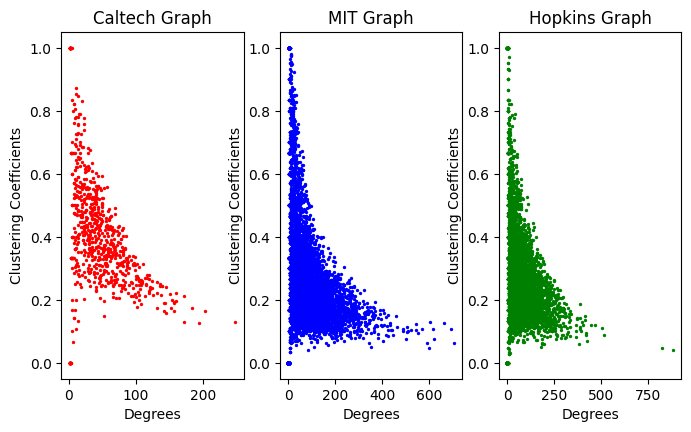

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16/2,9/2))

ax1.scatter(list(caltech_degrees.values()), list(clustering_caltech.values()), s= 2, color= "red")
ax1.set_title("Caltech Graph")
ax1.set_xlabel("Degrees")
ax1.set_ylabel("Clustering Coefficients")

ax2.scatter(list(mit_degrees.values()), list(clustering_mit.values()), s= 2, color= "blue")
ax2.set_title("MIT Graph")
ax2.set_xlabel("Degrees")
ax2.set_ylabel("Clustering Coefficients")


ax3.scatter(list(hopkins_degrees.values()), list(clustering_hopkins.values()), s= 2, color= "green")
ax3.set_title("Hopkins Graph")
ax3.set_xlabel("Degrees")
ax3.set_ylabel("Clustering Coefficients")






## Question 3

In [10]:
pip install progressbar2

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
import glob
from progressbar  import progressbar




In [12]:
list_of_files = glob.glob("fb100/question3/*.gml")
size=[]
assortativity_student=[]
assortativity_major=[]
assortativity_degree=[]
assortativity_dorm=[]
assortativity_gender=[]


In [13]:
l = len(list_of_files)
for i in progressbar(range(l)):
    f = list_of_files[i]
    g = nx.read_gml(f)
    size.append(g.size())
    assortativity_student.append(nx.attribute_assortativity_coefficient(g, "student_fac"))
    assortativity_major.append(nx.attribute_assortativity_coefficient(g, "major_index"))
    assortativity_degree.append(nx.degree_assortativity_coefficient(g))
    assortativity_dorm.append(nx.attribute_assortativity_coefficient(g, "dorm"))
    assortativity_gender.append(nx.attribute_assortativity_coefficient(g, "gender"))



100% (10 of 10) |########################| Elapsed Time: 0:04:01 Time:  0:04:01


In [14]:
#print("SIZE------", size)
#print("ASSORTIVITY---------",assortativity_student)

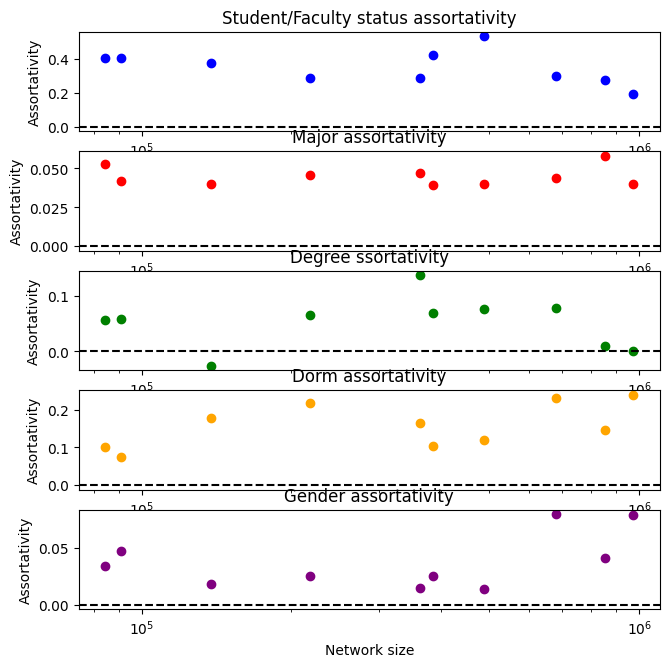

In [15]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(15/2,15/2))
#plt.figure()
ax1.scatter(size, assortativity_student, color="blue")
ax1.set_xscale("log")
#ax1.set_yscale("log")
ax1.set_title("Student/Faculty status assortativity")
ax1.set_xlabel("Network size")
ax1.set_ylabel("Assortativity")
ax1.axhline(y=0, color="black", ls="--") #no assortativity line

ax2.scatter(size, assortativity_major, color="red")
ax2.set_xscale("log")
ax2.set_title("Major assortativity")
ax2.set_xlabel("Network size")
ax2.set_ylabel("Assortativity")
ax2.axhline(y=0, color="black", ls="--") #no assortativity line

ax3.scatter(size, assortativity_degree, color="green")
ax3.set_xscale("log")
ax3.set_title("Degree ssortativity")
ax3.set_xlabel("Network size")
ax3.set_ylabel("Assortativity")
ax3.axhline(y=0, color="black", ls="--") #no assortativity line


ax4.scatter(size, assortativity_dorm, color="orange")
ax4.set_xscale("log")
ax4.set_title("Dorm assortativity")
ax4.set_xlabel("Network size")
ax4.set_ylabel("Assortativity")
ax4.axhline(y=0, color="black", ls="--") #no assortativity line


ax5.scatter(size, assortativity_gender, color="purple")
ax5.set_xscale("log")
ax5.set_title("Gender assortativity")
ax5.set_xlabel("Network size")
ax5.set_ylabel("Assortativity")
ax5.axhline(y=0, color="black", ls="--") #no assortativity line




In [16]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


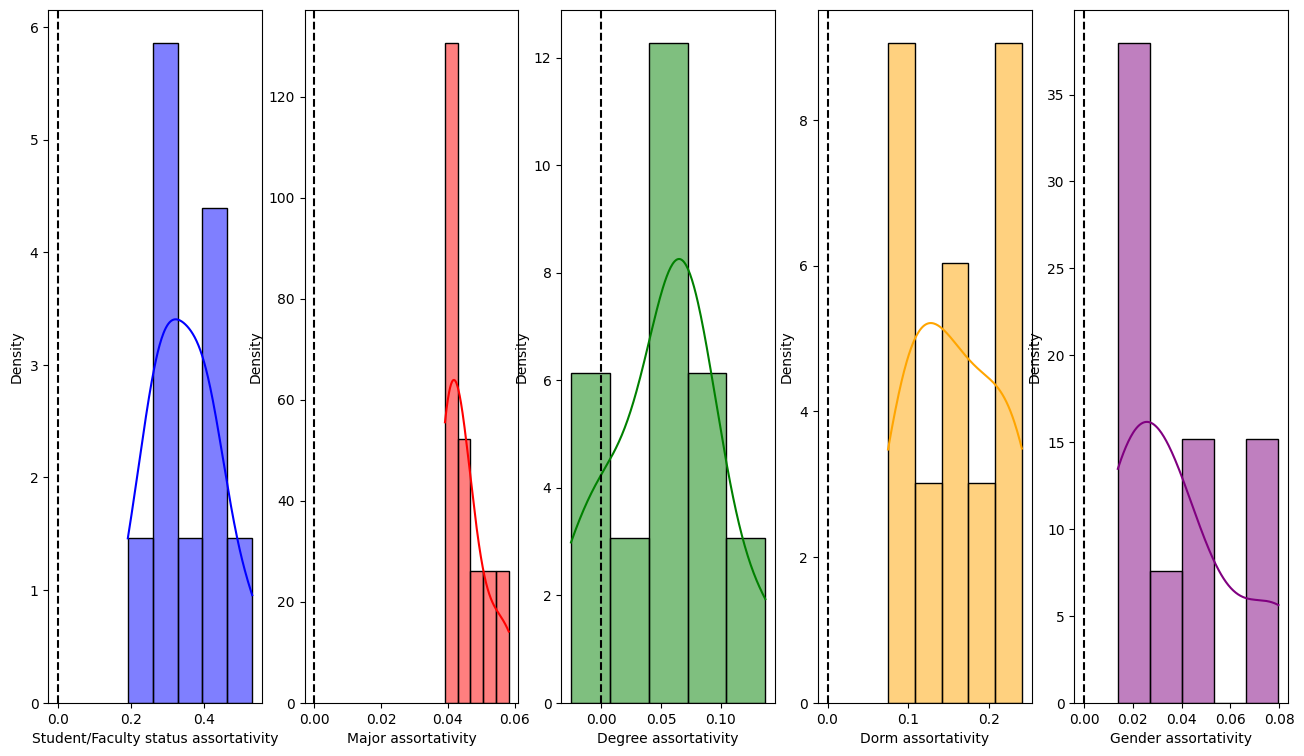

In [17]:
#distribution = [(elem, assortativity_student.count(elem)) for elem in sorted(set(assortativity_student))]
#k,pk = zip(*distribution)
#PDF = np.array(pk)/sum(pk)

import seaborn as sns
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(16, 9))
sns.histplot(assortativity_student, stat="density", kde=True, color="blue", ax=ax1)
ax1.set_xlabel("Student/Faculty status assortativity")
ax1.axvline(x=0, color="black", ls="--") #no assortativity line

sns.histplot(assortativity_major, stat="density", kde=True, color="red", ax=ax2)
ax2.set_xlabel("Major assortativity")
ax2.axvline(x=0, color="black", ls="--") #no assortativity line

sns.histplot(assortativity_degree, stat="density", kde=True, color="green", ax=ax3)
ax3.set_xlabel("Degree assortativity")
ax3.axvline(x=0, color="black", ls="--") #no assortativity line

sns.histplot(assortativity_dorm, stat="density", kde=True, color="orange", ax=ax4)
ax4.set_xlabel("Dorm assortativity")
ax4.axvline(x=0, color="black", ls="--") #no assortativity line

sns.histplot(assortativity_gender, stat="density", kde=True, color="purple", ax=ax5)
ax5.set_xlabel("Gender assortativity")
ax5.axvline(x=0, color="black", ls="--") #no assortativity line

## Question 4

In [78]:
import networkx as nx
import numpy as np
from sklearn.model_selection import train_test_split
import random

class LinkPrediction:
    def __init__(self, graph):
        self.graph = graph
        self.N = len(graph)

    def neighbors(self, v):
        return list(self.graph.neighbors(v))

    def fit(self, edges):
        raise NotImplementedError("Fit must be implemented")

class CommonNeighbors(LinkPrediction):
    def __init__(self, graph):
        super(CommonNeighbors, self).__init__(graph)

    def fit(self, edges):
        scores = []
        for u, v in edges:
            u_neighbors = set(self.neighbors(u))
            v_neighbors = set(self.neighbors(v))
            cn_score = len(u_neighbors.intersection(v_neighbors))
            scores.append(cn_score)
        return np.array(scores)

class Jaccard(LinkPrediction):
    def __init__(self, graph):
        super(Jaccard, self).__init__(graph)

    def fit(self, edges):
        scores = []
        for u, v in edges:
            u_neighbors = set(self.neighbors(u))
            v_neighbors = set(self.neighbors(v))
            jaccard_score = len(u_neighbors.intersection(v_neighbors)) / len(u_neighbors.union(v_neighbors))
            scores.append(jaccard_score)
        return np.array(scores)

class AdamicAdar(LinkPrediction):
    def __init__(self, graph):
        super(AdamicAdar, self).__init__(graph)

    def fit(self, edges):
        scores = []
        for u, v in edges:
            u_neighbors = set(self.neighbors(u))
            v_neighbors = set(self.neighbors(v))
            aa_score = sum(1/np.log(len(self.neighbors(w))) for w in u_neighbors.intersection(v_neighbors))
            scores.append(aa_score)
        return np.array(scores)



In [79]:
graph = nx.read_gml('fb100/data/Simmons81.gml')

# Randomly remove a fraction of edges from the graph
f = 0.2
edges = list(graph.edges())
num_edges_removed = int(f * len(edges))
edges_removed = random.sample(edges, num_edges_removed)
graph.remove_edges_from(edges_removed)

# Compute the link prediction scores for all node pairs using the three metrics
cn = CommonNeighbors(graph)
jaccard = Jaccard(graph)
aa = AdamicAdar(graph)

all_scores = np.column_stack((cn.fit(edges), jaccard.fit(edges), aa.fit(edges)))

# set of positive and negative links
edge_labels = np.zeros(len(edges), dtype=int)
for i, (u, v) in enumerate(edges):
    if graph.has_edge(u, v):
        edge_labels[i] = 1

# Split the edges into training and testing sets
train_edges, test_edges, train_labels, test_labels = train_test_split(edges, edge_labels, test_size=0.2, random_state=42)



In [80]:
# Define values of k to compute metrics for
ks = [50, 100, 200, 300, 400]

# Compute metrics for each k
for k in ks:
    
    cn_scores_sorted = cn.fit(test_edges).argsort()[::-1][:k]
    jaccard_scores_sorted = jaccard.fit(test_edges).argsort()[::-1][:k]
    aa_scores_sorted = aa.fit(test_edges).argsort()[::-1][:k]
    
    # Compute predicted edges
    predicted_edges = cn.fit(test_edges).argsort()[::-1][:k]
    
    #print("-------PREDICT EDGES", predicted_edges)
    
    # Compute intersection of removed edges and predicted edges
    removed_edges_set = set(removed_edges)
    predicted_edges_set = set(predicted_edges)
    intersection = removed_edges_set.intersection(predicted_edges_set)
    intersection_size = len(intersection)
    
    
    #print("-------PREDICT SET", predicted_edges_set)
    #print("-------INTERSECTION", intersection_size)
    # Compute true positives, false positives, and false negatives
    true_positives = intersection_size
    false_positives = len(predicted_edges_set) - intersection_size
    false_negatives = len(removed_edges_set) - intersection_size
    
    
    # Compute precision and recall
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    # Compute and print top@k, recall@k, and precision@k
    print(f"k={k}: top@k={intersection_size/k:.4f}, recall@k={recall:.4f}, precision@k={precision:.4f}")

-------INTERSECTION 0
k=50: top@k=0.0000, recall@k=0.0000, precision@k=0.0000
-------INTERSECTION 0
k=100: top@k=0.0000, recall@k=0.0000, precision@k=0.0000
-------INTERSECTION 0
k=200: top@k=0.0000, recall@k=0.0000, precision@k=0.0000
-------INTERSECTION 0
k=300: top@k=0.0000, recall@k=0.0000, precision@k=0.0000
-------INTERSECTION 0
k=400: top@k=0.0000, recall@k=0.0000, precision@k=0.0000


## Question 5

In [86]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import torch
import networkx as nx
import random


graph = nx.read_gml('fb100/data/Simmons81.gml')

def label_propagation(graph, labels):
    label_tensor = torch.LongTensor(list(labels.values()))

    A = nx.adjacency_matrix(graph)
    D = torch.diag(torch.sum(A, dim=1))
    L = D - A
    L = torch.FloatTensor(L.toarray())

    D_inv_sqrt = torch.diag(torch.sqrt(1 / torch.diag(D)))
    L_norm = torch.mm(D_inv_sqrt, torch.mm(L, D_inv_sqrt))

    Y = torch.eye(graph.number_of_nodes())
    Y_hat = (1 - alpha) * torch.inverse(torch.eye(graph.number_of_nodes()) - alpha * L_norm) * label_tensor
    labels = dict(zip(graph.nodes(), torch.argmax(Y_hat, dim=1).tolist()))
    return labels





In [ ]:
attributes = ['dorm', 'major', 'gender']


for attribute in attributes:
    print('Attribute:', attribute)
    print('-----------------')

    # Get the attribute dictionary
    attribute_dict = nx.get_node_attributes(graph, attribute)

    # Create a copy of the attribute dictionary
    attribute_dict_copy = dict(attribute_dict)

    # Determine the number of nodes to remove
    for pct in [0.1, 0.2, 0.3]:
        # Shuffle the attribute dictionary
        keys = list(attribute_dict_copy.keys())
        random.shuffle(keys)

        # Remove a percentage of the nodes
        for i in range(int(pct * len(keys))):
            attribute_dict_copy.pop(keys[i])

        # Perform label propagation to recover the missing attributes
        alpha = 0.1
        recovered_attributes = label_propagation(graph, attribute_dict_copy)

        # Compute the accuracy of the recovered attributes
        correct = 0
        for key in attribute_dict:
            if key in attribute_dict_copy:
                continue
            if attribute_dict[key] == recovered_attributes[key]:
                correct += 1
        accuracy = correct / (len(attribute_dict) - len(attribute_dict_copy))

        print('Nodes removed:', int(pct * 100), '%')
        print('Accuracy:', accuracy)
        print()

